In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [6]:
iris = datasets.load_iris()

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [45]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

<img src='https://goo.gl/tTbZMq'>
Sepal Length, Sepal Width, Petal Length, Petal Width

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

0 = I.setosa <br>
1 = I.versicolor <br>
2 = I.Virginica

In [10]:
X = iris.data[:, :2]  # we only take the first two features(sepal width and sepal length).
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

(1.5, 4.9)

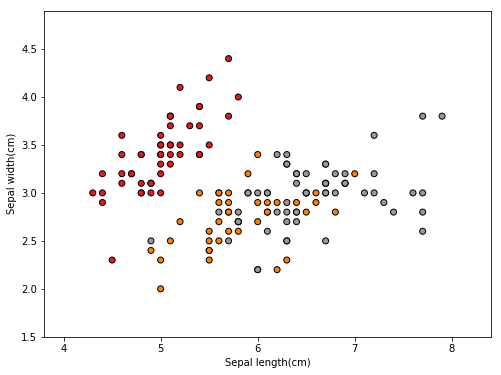

In [13]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())

In [14]:
# plot the first three PCA dimensions
# fig = plt.figure(1, figsize=(8, 6))
# ax = Axes3D(fig, elev=-150, azim=110)
# X_reduced = PCA(n_components=3).fit_transform(iris.data)
# ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
#            cmap=plt.cm.Set1, edgecolor='k', s=40)
# ax.set_title("First three PCA directions")
# ax.set_xlabel("1st eigenvector")
# ax.w_xaxis.set_ticklabels([])
# ax.set_ylabel("2nd eigenvector")
# ax.w_yaxis.set_ticklabels([])
# ax.set_zlabel("3rd eigenvector")
# ax.w_zaxis.set_ticklabels([])

In [15]:
iris.data.shape

(150, 4)

In [16]:
iris.target.shape

(150,)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.4, random_state=1)


In [22]:
x_train.shape

(90, 2)

In [19]:
y_train.shape

(120,)

In [23]:
x_test.shape

(60, 2)

In [40]:
y_test.shape

(60,)

In [34]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100),  max_iter=1000, alpha=0.0001,activation='relu',
                     solver='adam', verbose=10,  random_state=21,tol=0.000000001)

In [35]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 1.11661397
Iteration 2, loss = 1.09745591
Iteration 3, loss = 1.08550430
Iteration 4, loss = 1.07203965
Iteration 5, loss = 1.05897954
Iteration 6, loss = 1.04618171
Iteration 7, loss = 1.03447621
Iteration 8, loss = 1.02243110
Iteration 9, loss = 1.00971456
Iteration 10, loss = 0.99628858
Iteration 11, loss = 0.98254313
Iteration 12, loss = 0.96832501
Iteration 13, loss = 0.95346956
Iteration 14, loss = 0.93783173
Iteration 15, loss = 0.92195933
Iteration 16, loss = 0.90580875
Iteration 17, loss = 0.88979315
Iteration 18, loss = 0.87366502
Iteration 19, loss = 0.85685826
Iteration 20, loss = 0.83908466
Iteration 21, loss = 0.82106423
Iteration 22, loss = 0.80333873
Iteration 23, loss = 0.78529390
Iteration 24, loss = 0.76698547
Iteration 25, loss = 0.74845461
Iteration 26, loss = 0.73016331
Iteration 27, loss = 0.71244142
Iteration 28, loss = 0.69528864
Iteration 29, loss = 0.67857506
Iteration 30, loss = 0.66248224
Iteration 31, loss = 0.64705656
Iteration 32, los

In [36]:
loss_values = clf.loss_curve_


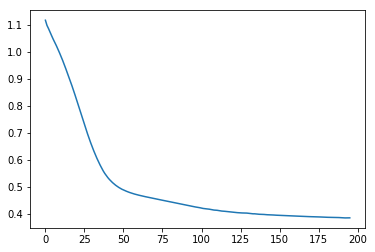

In [37]:
plt.plot(loss_values)


In [38]:
round(accuracy_score(y_test, y_pred),2)


0.73

In [41]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0,  0],
       [ 1, 10, 10],
       [ 0,  5, 15]])

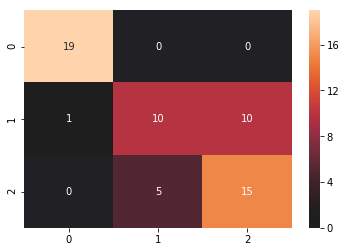

In [42]:
sns.heatmap(cm, center=True,annot=True)
plt.show()

In [44]:
data_baru = [[0.5, 4.3]]
clf.predict(data_baru)

array([0])